<a href="https://colab.research.google.com/github/jjpeh/W207/blob/dev_code/W207_Home_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W207 Final Project: Home Price Prediction

## Dataset Download and Preparation

Import necessary packages for analysis

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# dataset from Kaggle: kaggle competitions download -c house-prices-advanced-regression-techniques

Import Dataset from Kaggle

In [5]:
#!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
# copy the API key to the kaggle directory
!cp kaggle.json ~/.kaggle/
# list all kaggle api dataset
#!kaggle datasets list
# download dataset from kaggle for the first time
!kaggle competitions download -c house-prices-advanced-regression-techniques
!ls

Saving kaggle.json to kaggle (1).json
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
 data_description.txt   kaggle.json   sample_submission.csv   train.csv
'kaggle (1).json'       sample_data   test.csv


In [38]:
# read train and test dataset into dataframe
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
print(train_df.shape)
train_df.head(10)
#test_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [0]:
# 032119: commented out this block. create dev data from train_dataset instead
#Split test data into development and test data
# num_test_half = int(test_df.shape[0]/2)
# dev_df = test_df.iloc[:num_test_half]
# final_test_df =  test_df.iloc[num_test_half:]


In [0]:
#drop Id column which is not relevant to what we will be using
train_df.drop(['Id'], axis = 1, inplace = True)

## EXPLORATORY DATA ANALYSIS (EDA)

### Initial Features Study

In [8]:
# look at all features available
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Text(0.5, 1.0, 'Bar Chart of Home Features with Most Missing Values')

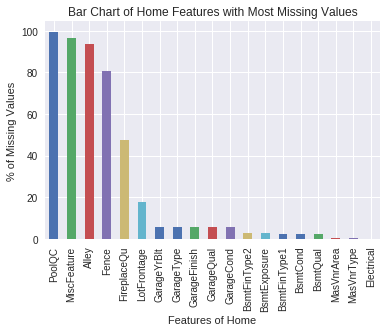

In [9]:
# check for null value in features

null_feature = train_df.isnull().sum()
pcnt_null = null_feature/(len(train_df))*100   # convert to % missing
pcnt_null = pcnt_null[pcnt_null>0]     # only display features with missing values
pcnt_null.sort_values(inplace=True, ascending=False)
pcnt_null.plot.bar()
plt.xlabel("Features of Home")
plt.ylabel("% of Missing Values")
plt.title("Bar Chart of Home Features with Most Missing Values")

In [10]:
# select top NA features to drop from study
null_features_to_drop = pcnt_null.index[0:5]
null_features_to_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

There're some features with a lot of missing values in the dataset, which could be a disturbance to our study. The 5 features with highest missing values are dropped.

In [0]:
# Drop features with much null values in the dataframe
train_df.drop(null_features_to_drop, axis = 1, inplace = True)

In [12]:
# split nonnumerical and numerical features
cat_features = train_df.select_dtypes(include=['object'])
#cat_features.head()
num_features = train_df.select_dtypes(exclude=['object'])
#num_features.head()
print("nonumerical features:", len(cat_features.columns))
print("numerical features:", len(num_features.columns))

nonumerical features: 38
numerical features: 37


In total, we are left with 37 numerical features and 38 non-numerical features


### Correlation Analysis: 
####Select top 25 features with highest correlation with Sale Price

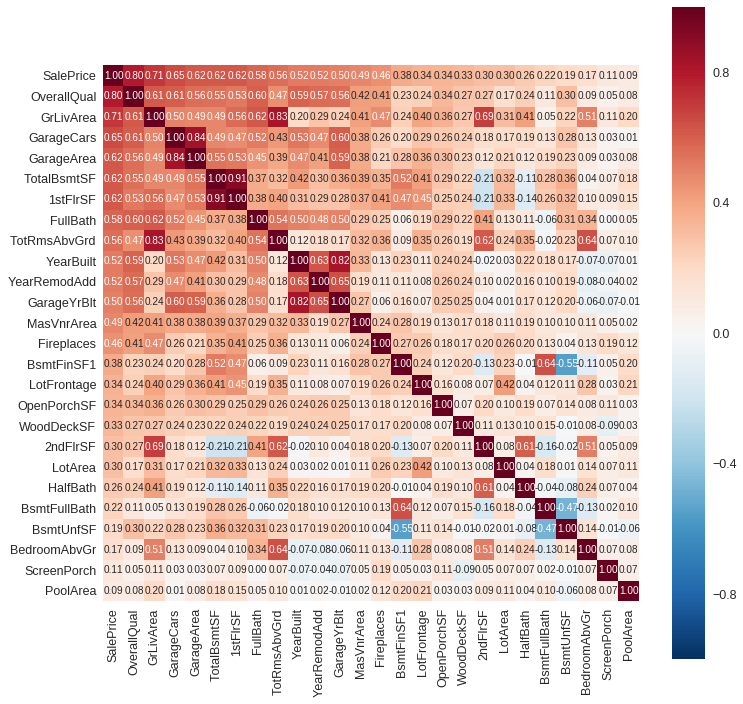

In [13]:
# Top 25 Heatmap
k = 26 #number of variables for heatmap
#drop null values for correlation calculation
train_df_nonull = train_df.dropna()  
corrmat = train_df_nonull.corr()
hi_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df_nonull[hi_cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=hi_cols.values, xticklabels=hi_cols.values, ax = ax)
plt.show()

In [14]:
# assign top 25 features that correlates to Sales Price in new dataframe
#top25_df = train_df[hi_cols[1:]]   # slice out SalePrice as it's outcome variable
top25_df = train_df_nonull[hi_cols]
top25_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,OpenPorchSF,WoodDeckSF,2ndFlrSF,LotArea,HalfBath,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea
0,208500,7,1710,2,548,856,856,2,8,2003,...,61,0,854,8450,1,1,150,3,0,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,0,298,0,9600,0,0,284,3,0,0
2,223500,7,1786,2,608,920,920,2,6,2001,...,42,0,866,11250,1,1,434,3,0,0
3,140000,7,1717,3,642,756,961,1,7,1915,...,35,0,756,9550,0,1,540,3,0,0
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,84,192,1053,14260,1,1,490,4,0,0


In [15]:
# split categorical and numerical features AGAIN
cat_features2 = top25_df.select_dtypes(include=['object'])
#cat_features2.head()
num_features2 = top25_df.select_dtypes(exclude=['object'])
#num_features2.head()
print("nonnumerical features of top 25:", len(cat_features2.columns))
print("numerical features of top 25:", len(num_features2.columns))

nonnumerical features of top 25: 0
numerical features of top 25: 26


### Selected Categorical Feature Analysis

In this section, we have selected some of the categorical features with high correlation with sale prices and take a deeper look into their relationship

In [0]:
#function to create boxplot
def priceboxplot(var):
    data = pd.concat([top25_df['SalePrice'], top25_df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
  

####1) Overall Quality

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


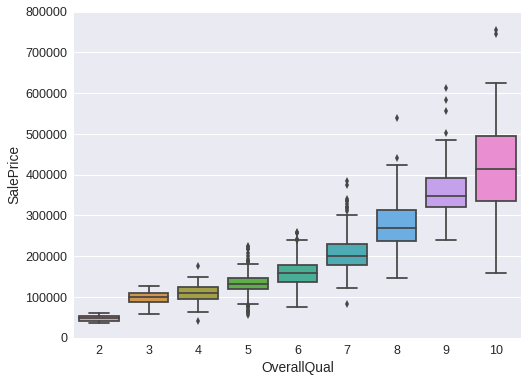

In [17]:
priceboxplot('OverallQual')

Overall quality feature variable, ranging from 1 to 10, has a very strong positive correlation with sales price.  The houses with overall quality rating 10, however, has the widest ranges of sales values

####2) GarageCars: Size of garage in car capacity

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


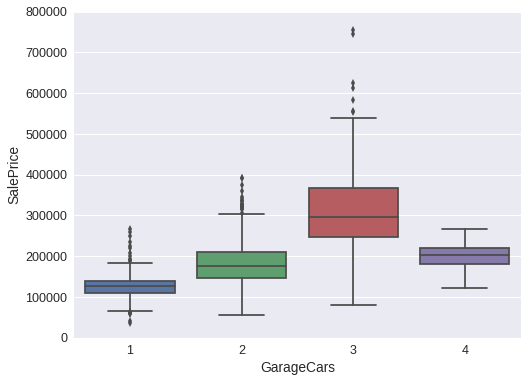

In [18]:
priceboxplot('GarageCars')

The size of garage in car capacity is overall positively correlated with the sales prices. However, we can see that the houses with 3-car garage size seems to have highest sale prices on average. It is possible to assume that those with 4-car garage might be situated in the countryside; therefore, the prices are relatively low.

####3) FullBath: Full bathrooms above grade

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


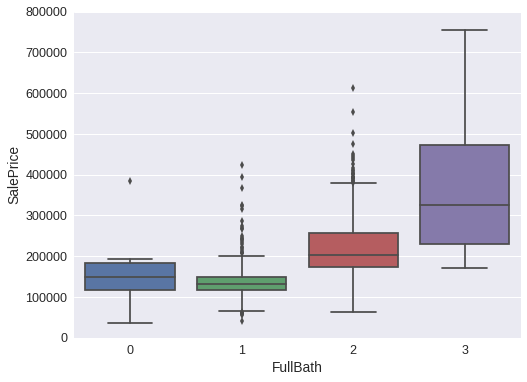

In [19]:
priceboxplot("FullBath")

The more bathrooms the houses have, the more valuable they are.

####4) YearBuilt, YearRemoddAdd, GarageYrBuilt

These three year built variables have quite a strong positive relationship with Saleprices and highly correlated with one another.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


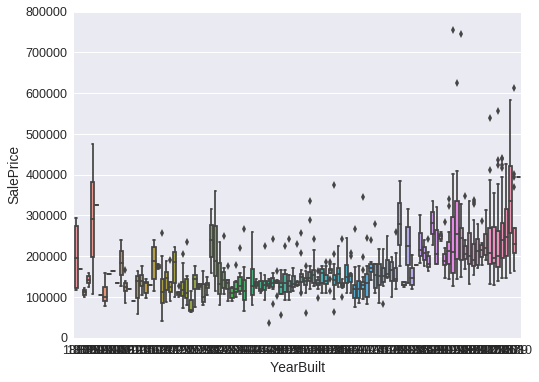

In [20]:
priceboxplot("YearBuilt")

### Numerical Data Analysis (JJ)

In [21]:
# summary of top features with numeric values
top25_df.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,OpenPorchSF,WoodDeckSF,2ndFlrSF,LotArea,HalfBath,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,187033.263254,6.247715,1535.027422,1.879342,503.760512,1099.561243,1173.809872,1.577697,6.570384,1972.412249,...,46.946984,94.341865,356.536563,10132.346435,0.389397,0.423218,606.117002,2.861974,16.498172,3.007313
std,83165.332151,1.366797,526.124028,0.658586,192.261314,415.851262,387.677463,0.550219,1.584486,31.189752,...,64.820019,122.624615,439.260130,8212.249621,0.500793,0.514253,445.834636,0.764107,58.455303,40.713175
min,35311.000000,2.000000,438.000000,1.000000,160.000000,105.000000,438.000000,0.000000,3.000000,1880.000000,...,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132500.000000,5.000000,1164.000000,1.000000,360.000000,816.000000,894.000000,1.000000,5.000000,1953.000000,...,0.000000,0.000000,0.000000,7606.750000,0.000000,0.000000,270.000000,2.000000,0.000000,0.000000
50%,165750.000000,6.000000,1480.000000,2.000000,484.000000,1023.000000,1097.000000,2.000000,6.000000,1975.000000,...,28.000000,0.000000,0.000000,9444.500000,0.000000,0.000000,525.000000,3.000000,0.000000,0.000000
75%,221000.000000,7.000000,1779.000000,2.000000,602.500000,1345.500000,1413.500000,2.000000,7.000000,2003.000000,...,68.000000,169.750000,729.000000,11387.250000,1.000000,1.000000,846.000000,3.000000,0.000000,0.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,12.000000,2010.000000,...,547.000000,857.000000,2065.000000,215245.000000,2.000000,2.000000,2336.000000,6.000000,480.000000,648.000000


- Lot frontage (linear feet of street connected to property) has lesser count
- lot area has big variation
- sales prices have some outliers
- MSSubClass should be categorical variable instead of numeric


##### Analysis on Outcome Variable: Sales Price

Text(0.5, 1.0, 'Histogram of log(Sales Price)')

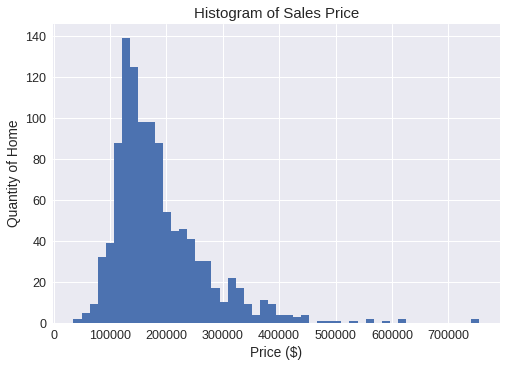

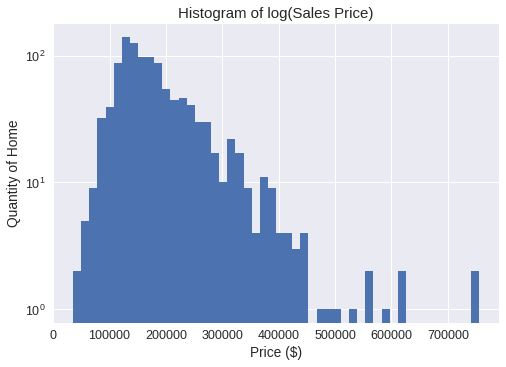

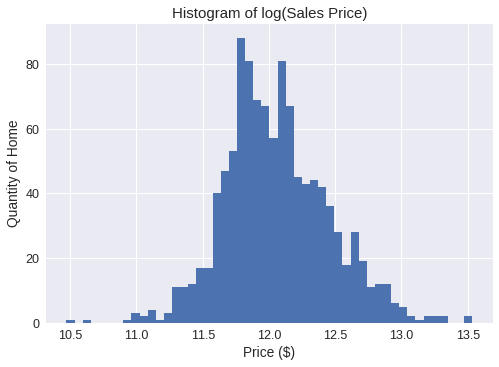

In [22]:
# Transformation on variables
transform_df = top25_df.copy() # create a copy on df to retain original data. transform_df will be used to store log values
transform_df['SalePrice'] = np.log(transform_df['SalePrice'])

# some initial plots on SalesPrice
plt.figure(1)
plt.hist("SalePrice", bins=50, data=top25_df)
plt.xlabel("Price ($)")
plt.ylabel("Quantity of Home")
plt.title("Histogram of Sales Price")

plt.figure(2)
#sns.distplot(top25_df['SalePrice'])
plt.hist("SalePrice", bins=50, data=top25_df, log=True)
plt.xlabel("Price ($)")
plt.ylabel("Quantity of Home")
plt.title("Histogram of log(Sales Price)")

# plot 3 is the expected log transformation
plt.figure(3)
plt.hist("SalePrice", bins=50, data=transform_df, log=False)
plt.xlabel("Price ($)")
plt.ylabel("Quantity of Home")
plt.title("Histogram of log(Sales Price)")

##### Scatter Plot Matrix on Numerical Data

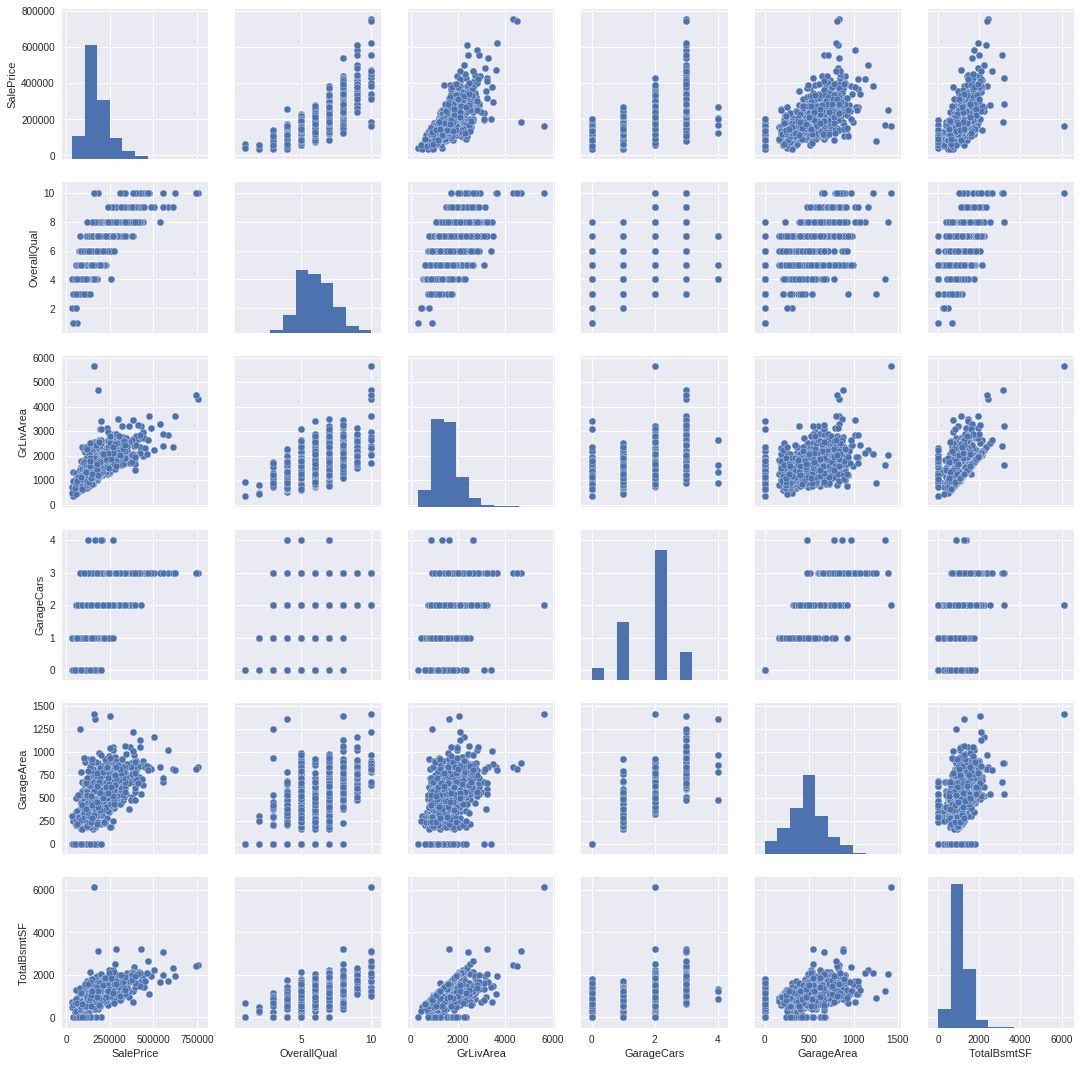

In [23]:
# Look at scatter plot matrix for important variables
sns.set()
scatter1 = hi_cols[0:6] # sales price with top 5 features
sns.pairplot(train_df[scatter1], size = 2.5)

Above are some of the features that could potentially affect the price of home sales price.
- Overall Qual and year of build is linearly correlated to sales price.
- Most of the old houses (year of built) are priced on the lower range.
- Not much correlation between lot area with sales price



##### Bivariate analysis on individual correlation via scatter plots

<Figure size 576x396 with 0 Axes>

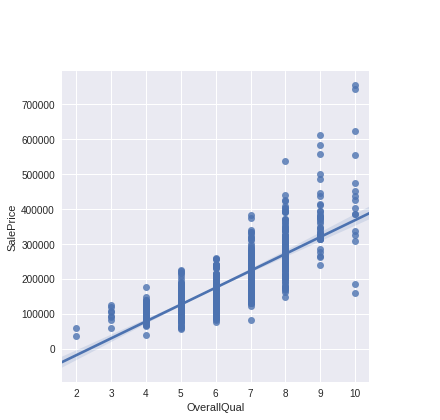

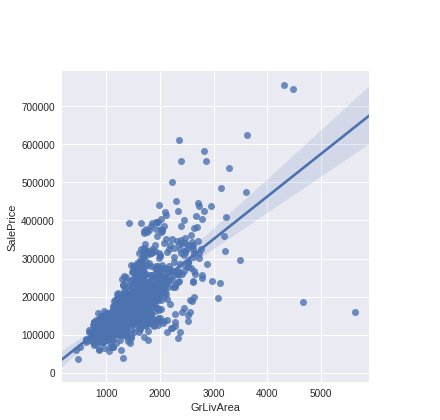

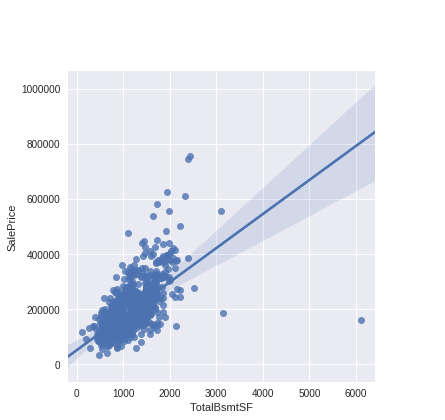

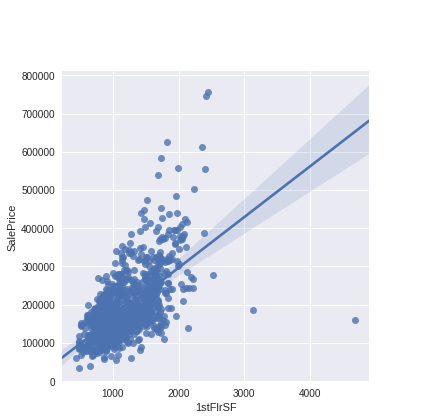

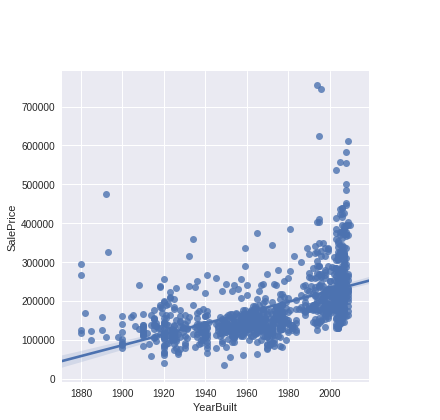

In [24]:
# plot multivariate graphs with seaborn
def multivariate_plot(x,y,data,fig_num):
  plt.figure(fig_num)
  g=sns.JointGrid(x=x, y=y, data=data)
  g.plot_joint(sns.regplot)
  g.ax_marg_x.set_axis_off()
  g.ax_marg_y.set_axis_off()

numplots_label = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
# numplots vs SalePrice
for i,item in enumerate(numplots_label):
  multivariate_plot(x=item, y="SalePrice", data=top25_df, fig_num=i)
  

Top 5 features having positive linear relationship with sales price. Some outliers on GrLivArea and TotalBsmtArea with extremely high x-value but low y-value that needs to be investigated.

##### Outliers Removal

<Figure size 576x396 with 0 Axes>

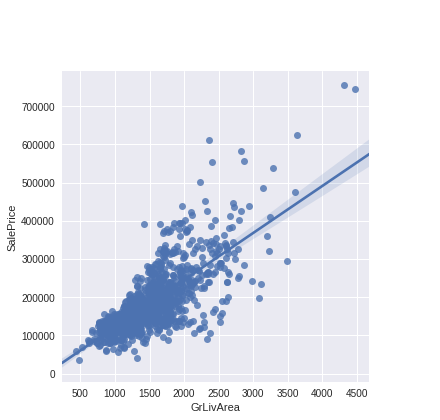

<Figure size 576x396 with 0 Axes>

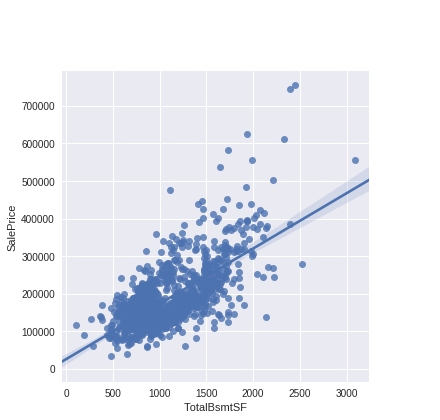

In [25]:
# GrLivArea has outliers at area larger than 4000 but price lower than 200000, that don't obey the linear relationship
top25_df = top25_df.drop(top25_df[(top25_df['GrLivArea']>4000) & (top25_df['SalePrice']<200000)].index)
multivariate_plot(x="GrLivArea", y="SalePrice", data=top25_df, fig_num=2)

# TotalBsmtSF has outlier at extremely large basement area but low sales price
top25_df = top25_df.drop(top25_df[(top25_df['TotalBsmtSF']>6000)].index)
multivariate_plot(x="TotalBsmtSF", y="SalePrice", data=top25_df, fig_num=1)

# Outliers Removal for SalePrice itself???


In [0]:
# save important numeric features here for modeling
good_features_numeric = ['OverallCond', 'YearBuilt']

In [0]:
# Plot variables in box plot to look at categorical data
#plt.figure(1)
#sns.boxplot(x='Street', y='SalePrice', data=train_df)
#sns.swarmplot(x='Street', y='SalePrice', data=train_df,color=".25")

# plot alley, need to fill up NA as a new category
#train_df['Alley'] = train_df['Alley'].astype('category')
#if train_df['Alley'].isnull().any():
#  train_df['Alley'] = train_df['Alley'].cat.add_categories(['No_entry'])
#  train_df['Alley'] = train_df['Alley'].fillna('No_entry')
  
#box_features = ['Street', 'Alley', 'MSSubClass', 'MSZoning', 'LotShape']
#for i in box_features:
#  plt.figure(i)
#  sns.boxplot(x=i, y='SalePrice', data=train_df)


### Transformation (JJ)

count    1092.000000
mean     1972.347985
std        31.182085
min      1880.000000
25%      1953.000000
50%      1975.000000
75%      2003.000000
max      2010.000000
Name: YearBuilt, dtype: float64
count    1092.000000
mean       37.652015
std        31.182085
min         0.000000
25%         7.000000
50%        35.000000
75%        57.000000
max       130.000000
Name: HouseAge, dtype: float64


<Figure size 576x396 with 0 Axes>

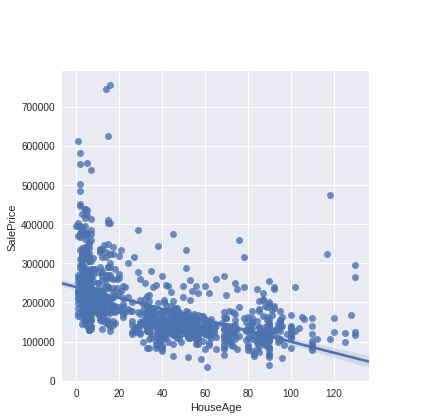

In [27]:
# transform YearBuilt into Age of House being build makes more sense.
print(top25_df['YearBuilt'].describe())
# created new column 'HouseAge'
top25_df['HouseAge'] = abs(2010 - top25_df['YearBuilt'])
print(top25_df['HouseAge'].describe())
multivariate_plot(x="HouseAge", y="SalePrice", data=top25_df, fig_num=1)



SalePrice depreciates with the age of house.

#### Final Dataframe from EDA

This dataframe will contain the filtered features that have reasonable and highest correlation with SalePrice of house. It will be used as the base for our statistical modeling.

In [28]:
# transform_df = top25_df.copy() # create a copy on df to retain original data. transform_df will be used to store log values
# Drop features with much null values in the dataframe
redundant_features_to_drop = ['YearBuilt', 'GarageArea']
transform_df.drop(redundant_features_to_drop, axis = 1, inplace = True)
print('features on final dataframe for modeling:\n', transform_df.columns)


features on final dataframe for modeling:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF',
       'WoodDeckSF', '2ndFlrSF', 'LotArea', 'HalfBath', 'BsmtFullBath',
       'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea'],
      dtype='object')


### Check for Correlation and Covariance

## FEATURE ENGINEERING

## MODELING

In [45]:
# split filtered dataset into train_data (4/5) and dev_data (1/5)
num_train = int(transform_df.shape[0]*(4/5))
train_data = transform_df.iloc[:num_train]
dev_data =  transform_df.iloc[num_train:]

print(train_data.shape)
print(dev_data.shape)

# separate SalePrice as train label
train_label = train_data.pop('SalePrice')
dev_label = dev_data.pop('SalePrice')
print(train_label.head())
print(train_data.shape)

(875, 24)
(219, 24)
0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64
(875, 23)


#### Linear Regression Model (JJ)

In [71]:
# vectproze train_data and train_label
train_data_matrix = train_data.as_matrix()
train_label_matrix = train_label.as_matrix()
dev_data_matrix = dev_data.as_matrix()
dev_label_matrix = dev_label.as_matrix()
print(train_data_matrix.shape)    
print(train_label_matrix.shape)  
  
# use linear regression as 1st model
model1_lr = LinearRegression()
model1_lr.fit(train_data_matrix, train_label_matrix)
pred = model1_lr.predict(dev_data_matrix)
coeff = model1_lr.coef_
print('LR Mean squared error: {:.3}'.format(mean_squared_error(dev_label, pred)))
print('LR Reg R2 score: {:.3}'.format(r2_score(dev_label, pred)))

# JJ comment: F1 score only takes in 1D-array. we will use this if we want to analyze f1score feature by feature 
###print('LR Reg F1 score: {:.3}'.format(f1_score(dev_label, pred)))

### remember that SalePrice has been log transformed. need to use np.exp() to convert it back to actual SalePrice





(875, 23)
(875,)
LR Mean squared error: 0.0555
LR Reg R2 score: 0.587


In [97]:
# check coefficient on each label
print(coeff)
print(dev_data.columns.tolist())

lr_list = [('Features', dev_data.columns.tolist()),
         ('Coefficients', coeff.tolist()),
         ]
lr_df = pd.DataFrame.from_items(sales)
lr_df

[ 9.03117611e-02  2.45259261e-05  2.88888779e-02  1.75754874e-04
  8.47418699e-05  4.61750279e-02  1.20697772e-02  3.38385319e-03
  1.10644374e-03  1.99565558e-05  5.12238611e-02  6.65420308e-05
  1.39472084e-03  4.84752166e-05  9.17289420e-05  1.02164842e-04
  2.08972083e-06  5.15023060e-02  2.16427637e-02 -3.01692767e-05
  9.39917912e-05  3.51367602e-04 -2.00023714e-04]
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'LotArea', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea']


,Features,Coefficients
0,OverallQual,0.090312
1,GrLivArea,0.000025
2,GarageCars,0.028889
3,TotalBsmtSF,0.000176
4,1stFlrSF,0.000085
5,FullBath,0.046175
6,TotRmsAbvGrd,0.012070
7,YearRemodAdd,0.003384
8,GarageYrBlt,0.001106
9,MasVnrArea,0.000020


#### KNN Model (Ploy)

## CONCLUSION

### Discussion on some improvements to be done and omitted variables to be considered

## REFERENCE & ADDITIONAL RESOURCES

References from Kaggle:
- https://www.kaggle.com/harlfoxem/house-price-prediction-part-2
- https://www.kaggle.com/dgawlik/house-prices-eda/notebook
- https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

References on Python:
- https://seaborn.pydata.org/tutorial/distributions.html

#####to create dummies:

https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

pd.factorize(df['purchase'])[0]
Example:

labels, uniques = pd.factorize(['b', 'b', 'a', 'c', 'b'])


labels
array([0, 0, 1, 2, 0])


uniques
array(['b', 'a', 'c'], dtype=object)